In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df_pi=pd.read_csv("pima-data.csv")

In [4]:
df_pi.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df_pi.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [6]:
df_pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.8 KB


In [9]:
df_pi['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [14]:
#converting diabetes column which is categorical to numerical False=0 ,and True=1
diabetes_map = {True: 1, False: 0}
df_pi['diabetes'] = df_pi['diabetes'].map(diabetes_map)

In [15]:
df_pi.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


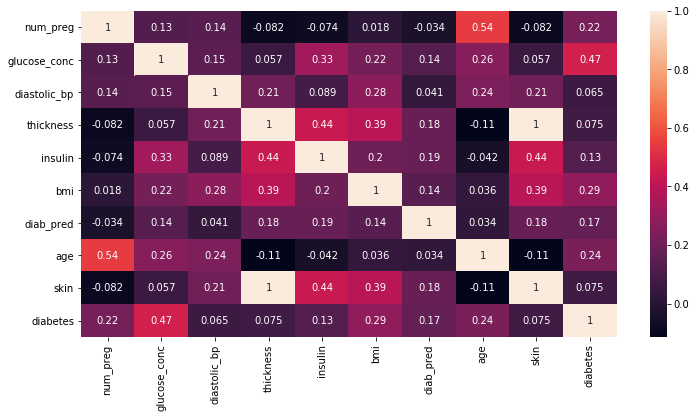

In [16]:
plt.figure(figsize=(12,6))
sb.heatmap(df_pi[df_pi.columns[0:]].corr(),annot=True)
#As, we can see Glucose level and age are two main factors that are cooreralted with diabetes in this case 


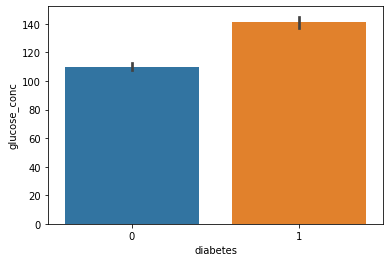

In [19]:
sb.barplot(x='diabetes',y='glucose_conc',data=df_pi)
#mean glucose level of people not having diabetes is around 110 and  people having diabetes is around 140

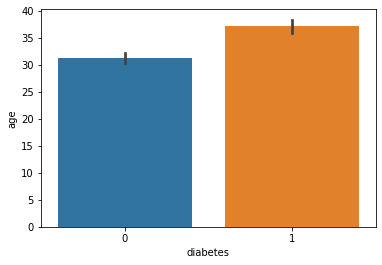

In [20]:
sb.barplot(x='diabetes',y='age',data=df_pi)
#mean age level of people not having diabetes is around 28 and  people having diabetes is around 35


In [21]:
df_pi.columns


Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [25]:
#Let's do Feature scaling on the entire data set
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X=df_pi[['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi','diab_pred', 'age']]
y=df_pi['diabetes']           
std_scaler.fit(X)
scaled_X=std_scaler.transform(X)
final_X=pd.DataFrame(scaled_X,columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi','diab_pred', 'age'])

In [34]:
final_X.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672


In [39]:
# Let's divide the data set into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X,y,test_size=0.30)

In [40]:
# Let's Try Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
lgrm=LogisticRegression()
lgrm.fit(X_train,y_train)
preds=lgrm.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       142
           1       0.72      0.57      0.64        89

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.74       231



C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#try SVM
from sklearn.svm import SVC
model = SVC()
model.kernel='rbf'
model.C=0.25
model.fit(X_train,y_train)

C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
#predict
predictions = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       142
           1       0.83      0.61      0.70        89

    accuracy                           0.80       231
   macro avg       0.81      0.76      0.78       231
weighted avg       0.81      0.80      0.79       231

